In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./csv/continuous_prep.csv', index_col =0)
df.head()

,default_tf,bsn_opr_month,comsale_join_date_opr_month,soven_cert_date_opr_month,mois_permission_date_opr_month,inno_cert_date_cnt,mainbiz_cert_date_cnt,venture_cert_date_cnt,lab_cnt,stand_date_opr_month,...,design_reg_num_opr_month,cprgt_cnt,copyright_reg_date_opr_month,article_cnt,article_ym_opr_month,total,inv_opr_month,sum,investor_cnt,pblntf_pclnd
0,0,679,0.0,0.0,0.0,0,0,0,0.0,11.0,...,0.0,0,0.0,0,0.0,5,0.0,0.0,0.0,25740.0
1,0,679,0.0,0.0,0.0,0,0,0,0.0,12.0,...,0.0,0,0.0,0,0.0,5,0.0,0.0,0.0,25740.0
2,0,679,0.0,0.0,0.0,0,0,0,0.0,1.0,...,0.0,0,0.0,0,0.0,5,0.0,0.0,0.0,25740.0
3,0,679,0.0,0.0,0.0,0,0,0,0.0,2.0,...,0.0,0,0.0,0,0.0,5,0.0,0.0,0.0,25740.0
4,0,679,0.0,0.0,0.0,0,0,0,0.0,3.0,...,0.0,0,0.0,0,0.0,5,0.0,0.0,0.0,25740.0


In [3]:
target = df['default_tf']
data = df.drop('default_tf',axis=1)

## split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(data, target, random_state = 77, stratify=target)

## Scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler

# 변형 객체 생성
minmax_scaler = MinMaxScaler()

# 훈련데이터의 모수 분포 저장
minmax_scaler.fit(x_train)

# 훈련 데이터 스케일링
x_train_scaled = minmax_scaler.transform(x_train)

# 테스트 데이터의 스케일링
x_test_scaled = minmax_scaler.transform(x_test)

In [6]:
x_train_scale = pd.DataFrame(x_train_scaled)
x_train_scale.to_csv('./csv/x_train_scaled_mm.csv')
x_test_scale = pd.DataFrame(x_test_scaled)
x_test_scale.to_csv('./csv/x_test_scaled_mm.csv')

## KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

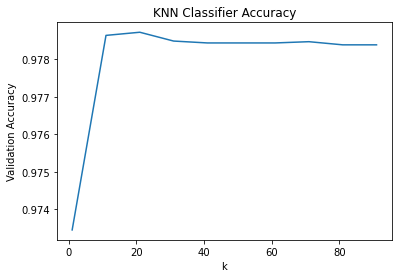

In [9]:
import matplotlib.pyplot as plt
k_list = range(1,101,10)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train_scaled, y_train)
    accuracies.append(classifier.score(x_test_scaled, y_test))
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("KNN Classifier Accuracy")
plt.show()

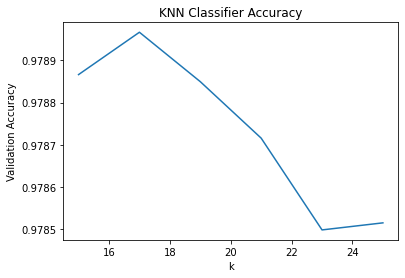

In [10]:
import matplotlib.pyplot as plt
k_list = range(15,26,2)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train_scaled, y_train)
    accuracies.append(classifier.score(x_test_scaled, y_test))
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("KNN Classifier Accuracy")
plt.show()

### 찾은 K값으로 KNN 돌려서 예측하기

In [11]:
classifier = KNeighborsClassifier(n_neighbors = 17)

In [12]:
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=17)

In [14]:
pred = classifier.predict(x_test_scaled)

In [15]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)
cm

array([[58353,    24],
       [ 1231,    60]], dtype=int64)